In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# most_runs_average_strikerate.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
dataset=pd.read_csv('C:/Users/Sagar K/Desktop/IPL-Batting-analysis-main/ipldata.csv', delimiter=',', nrows = nRowsRead)
dataset.dataframeName = 'most_runs_average_strikerate.csv'
nRow, nCol = dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 516 rows and 6 columns


In [16]:
dataset.head(5)

batsman  out  numberofballs    average  strikerate  total_runs
0    V Kohli  152           4111  35.697368  131.987351        5426
1   SK Raina  160           3916  33.662500  137.538304        5386
2  RG Sharma  161           3742  30.447205  130.999466        4902
3  DA Warner  114           3292  41.377193  143.286756        4717
4   S Dhawan  137           3665  33.583942  125.538881        4601

In [17]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [18]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    

In [19]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [20]:
plotPerColumnDistribution(dataset, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [21]:
dataset.shape

(516, 6)

C:\Users\Sagar K\AppData\Local\Temp\ipykernel_5712\844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


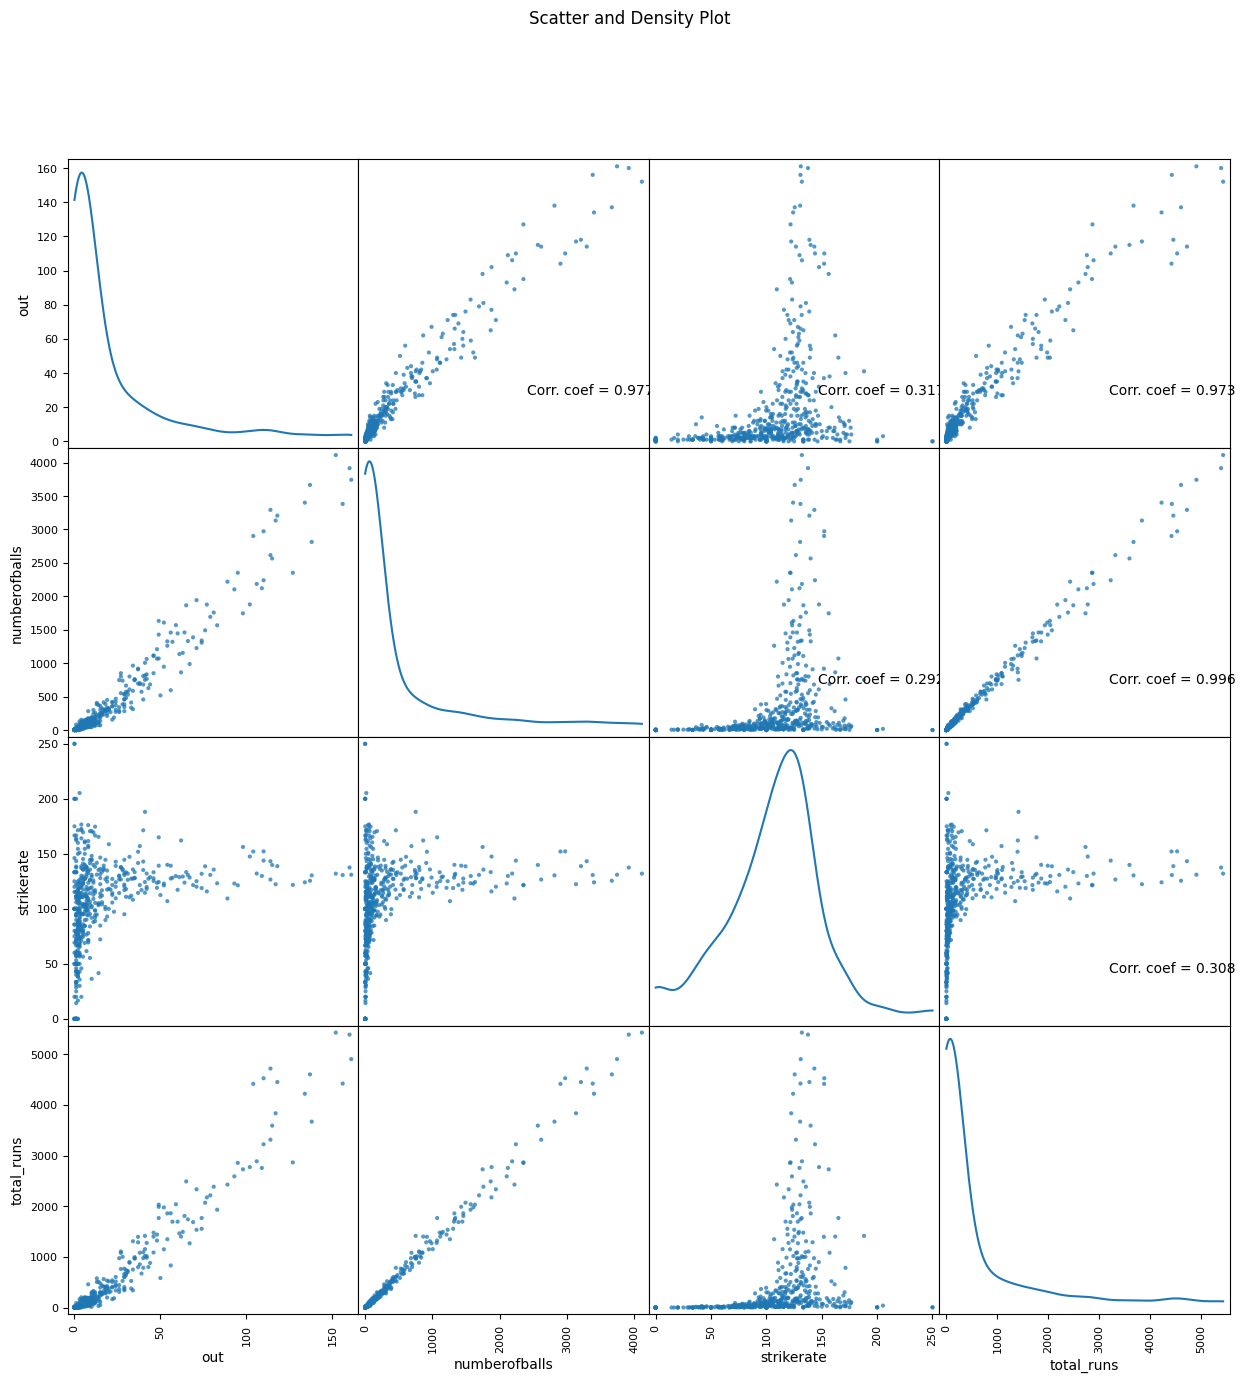

In [22]:
plotScatterMatrix(dataset, 15, 10)

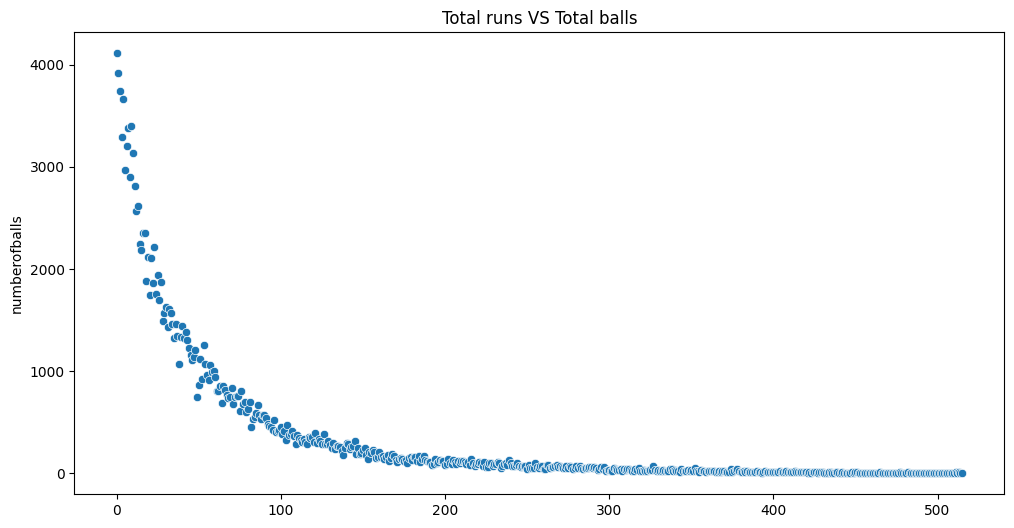

In [23]:
plt.figure(figsize=(12,6))
plt.title('Total runs VS Total balls')
sns.scatterplot(dataset.numberofballs);

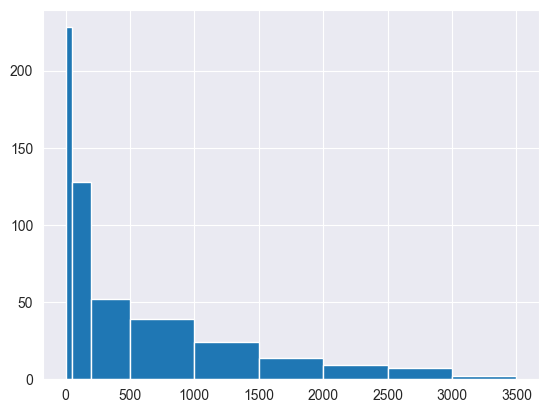

In [24]:
sns.set_style("darkgrid")
plt.hist(dataset.total_runs, bins=[0,50,200,500,1000,1500,2000,2500,3000,3500]);

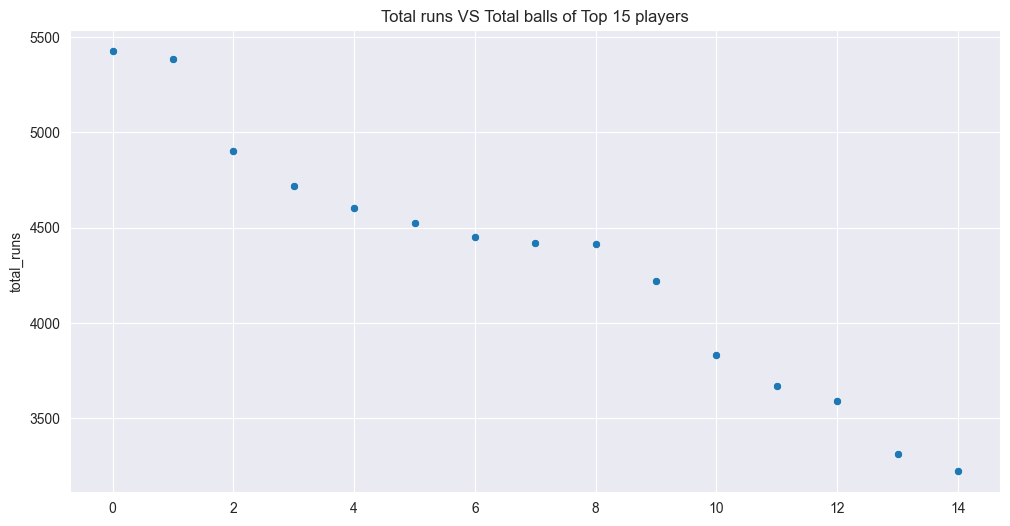

In [25]:
most_runs_df = dataset.sort_values(by='total_runs',ascending=False)
most_df=most_runs_df.head(15)
plt.figure(figsize=(12,6))
plt.title('Total runs VS Total balls of Top 15 players')
sns.scatterplot(most_df.total_runs);

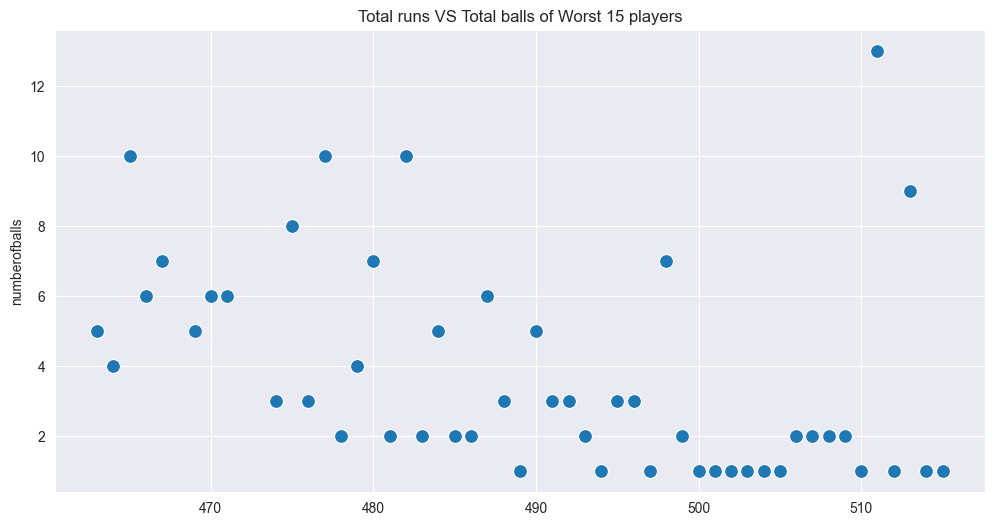

In [13]:
most_runs_df = dataset.sort_values(by='total_runs',ascending=True)
least_df=most_runs_df.head(50)
plt.figure(figsize=(12,6))
plt.title('Total runs VS Total balls of Worst 15 players')
sns.scatterplot(least_df.numberofballs,s=100);

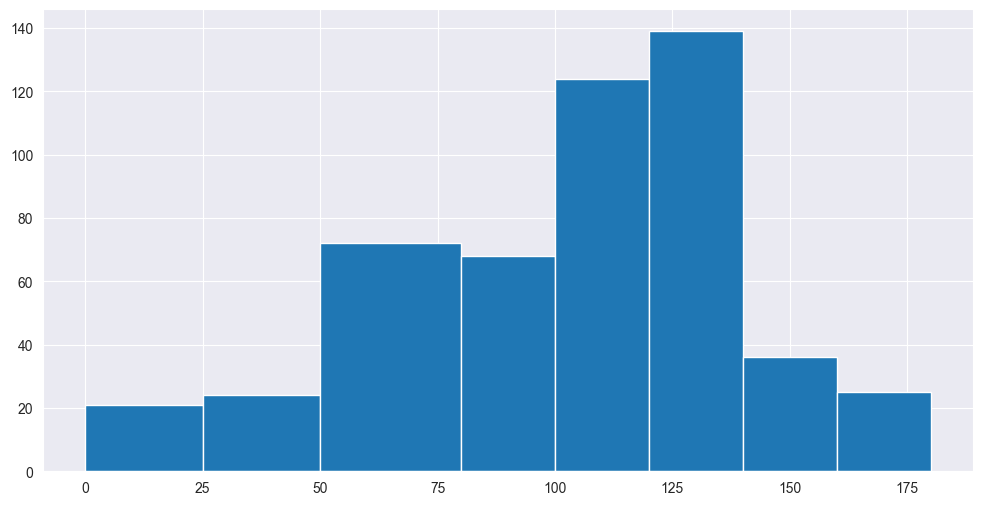

In [26]:
plt.figure(figsize=(12,6))
plt.hist(dataset.strikerate, bins=[0,25,50,80,100,120,140,160,180]);

<AxesSubplot: title={'center': 'Top players with best average'}, ylabel='average'>

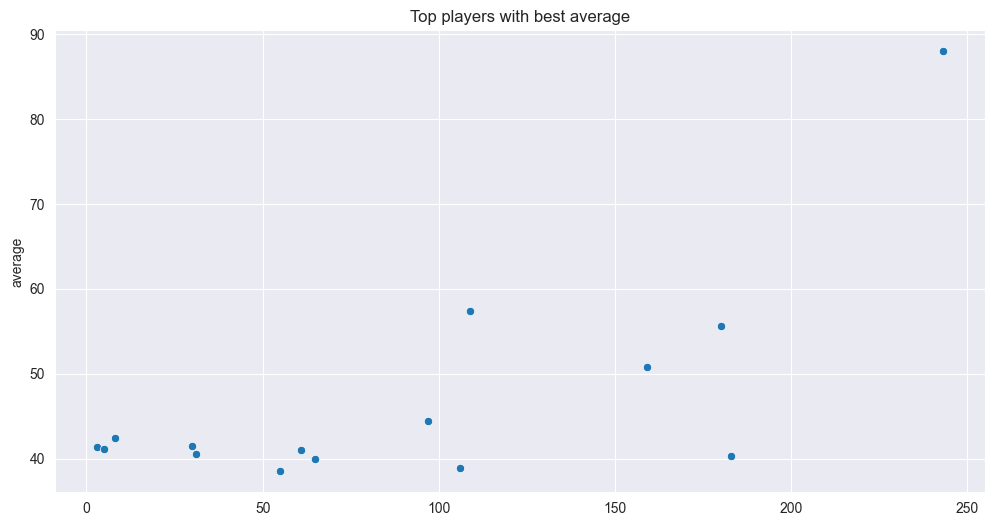

In [32]:
mostt_runs_df = dataset.sort_values(by='average',ascending=False)
mosttt_df=mostt_runs_df.head(15)
plt.figure(figsize=(12,6))
plt.title('Top players with best average')
sns.scatterplot(mosttt_df.average)

Text(0.5, 1.0, 'Run VS Balls')

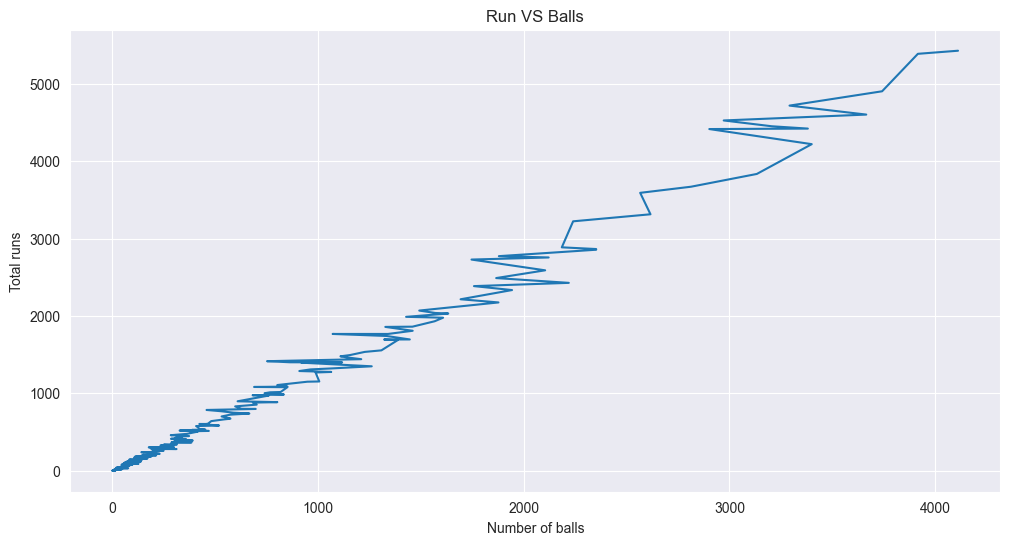

In [33]:
plt.figure(figsize=(12,6))
plt.plot(dataset.numberofballs, dataset.total_runs)


plt.xlabel('Number of balls')
plt.ylabel('Total runs')

plt.title("Run VS Balls")

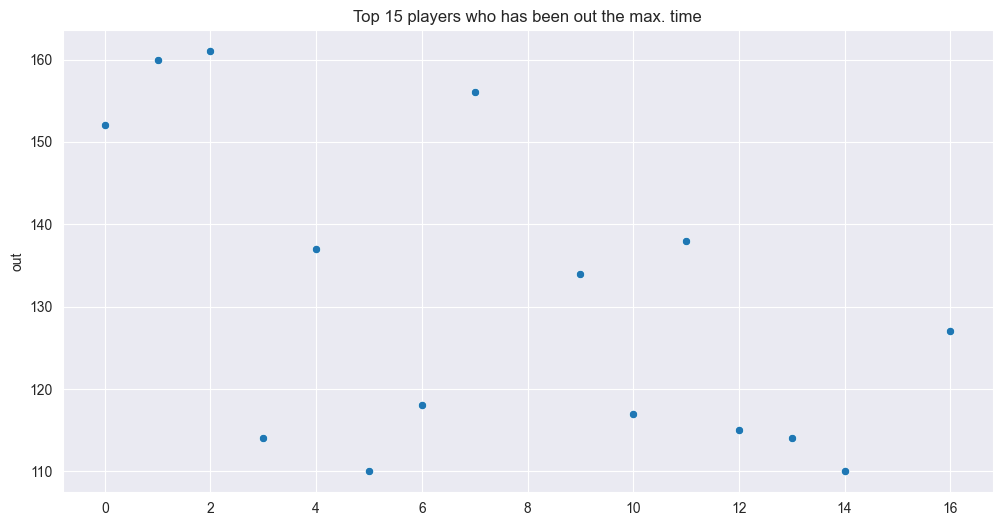

In [34]:
out_df = dataset.sort_values(by='out',ascending=False)
outt_df=out_df.head(15)
plt.figure(figsize=(12,6))
plt.title('Top 15 players who has been out the max. time')
sns.scatterplot(outt_df.out);

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<AxesSubplot: xlabel='batsman'>

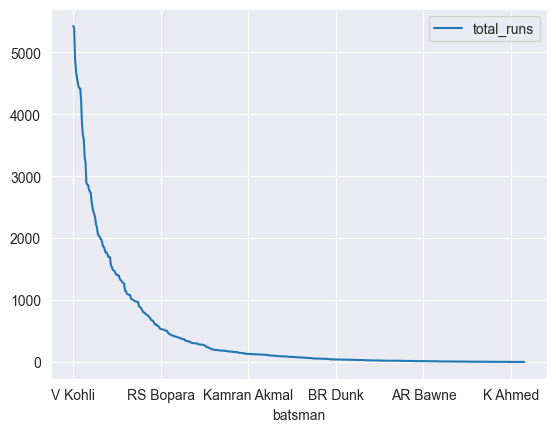

In [36]:
dataset.plot("batsman", "total_runs")

In [37]:
#numpy is a number manipulation librarry(using large data which is in our dataset)
#scikit-learn contains all machine learning packages

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
dataset=pd.read_csv('C:/Users/Sagar K/Desktop/IPL-Batting-analysis-main/ipldata.csv', delimiter=',', nrows = nRowsRead)

In [41]:
print(dataset)

            batsman  out  numberofballs    average  strikerate  total_runs
0           V Kohli  152           4111  35.697368  131.987351        5426
1          SK Raina  160           3916  33.662500  137.538304        5386
2         RG Sharma  161           3742  30.447205  130.999466        4902
3         DA Warner  114           3292  41.377193  143.286756        4717
4          S Dhawan  137           3665  33.583942  125.538881        4601
..              ...  ...            ...        ...         ...         ...
511        ND Doshi    1             13   0.000000    0.000000           0
512         J Denly    1              1   0.000000    0.000000           0
513         S Ladda    2              9   0.000000    0.000000           0
514  V Pratap Singh    1              1   0.000000    0.000000           0
515       S Kaushik    1              1   0.000000    0.000000           0

[516 rows x 6 columns]


In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
dataset=pd.read_csv('C:/Users/Sagar K/Desktop/IPL-Batting-analysis-main/ipldata.csv', delimiter=',', nrows = nRowsRead)

print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   out            516 non-null    int64  
 2   numberofballs  516 non-null    int64  
 3   average        482 non-null    float64
 4   strikerate     516 non-null    float64
 5   total_runs     516 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB
None


In [44]:
medianVal=dataset.average.median()
medianVal
dataset.average=dataset.average.fillna(medianVal)

In [45]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   out            516 non-null    int64  
 2   numberofballs  516 non-null    int64  
 3   average        516 non-null    float64
 4   strikerate     516 non-null    float64
 5   total_runs     516 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB
None


In [46]:

x=dataset.iloc[:,1:4].values
y=dataset.iloc[:,5].values
print(x)
print(y)

[[1.52000000e+02 4.11100000e+03 3.56973684e+01]
 [1.60000000e+02 3.91600000e+03 3.36625000e+01]
 [1.61000000e+02 3.74200000e+03 3.04472050e+01]
 ...
 [2.00000000e+00 9.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00]]
[5426 5386 4902 4717 4601 4525 4450 4420 4414 4219 3834 3669 3590 3313
 3222 2886 2864 2855 2772 2755 2728 2589 2489 2427 2385 2334 2215 2174
 2069 2038 2031 1988 1977 1931 1861 1858 1808 1767 1767 1741 1696 1695
 1687 1555 1535 1494 1478 1465 1441 1415 1401 1400 1396 1349 1322 1309
 1288 1276 1269 1153 1150 1107 1093 1087 1082 1079 1017 1013 1001  995
  985  975  974  971  969  897  886  880  854  831  800  798  785  768
  761  750  739  724  701  676  672  663  641  608  604  604  584  577
  563  538  531  527  526  519  514  510  506  505  476  459  448  443
  437  424  423  417  412  409  405  401  394  390  388  376  375  368
  366  365  342  340  339  337  327  326  317  310  304  304  302  

In [47]:
dataset.isnull()

batsman    out  numberofballs  average  strikerate  total_runs
0      False  False          False    False       False       False
1      False  False          False    False       False       False
2      False  False          False    False       False       False
3      False  False          False    False       False       False
4      False  False          False    False       False       False
..       ...    ...            ...      ...         ...         ...
511    False  False          False    False       False       False
512    False  False          False    False       False       False
513    False  False          False    False       False       False
514    False  False          False    False       False       False
515    False  False          False    False       False       False

[516 rows x 6 columns]

In [48]:
dataset.isnull().sum()

batsman          0
out              0
numberofballs    0
average          0
strikerate       0
total_runs       0
dtype: int64

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   out            516 non-null    int64  
 2   numberofballs  516 non-null    int64  
 3   average        516 non-null    float64
 4   strikerate     516 non-null    float64
 5   total_runs     516 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


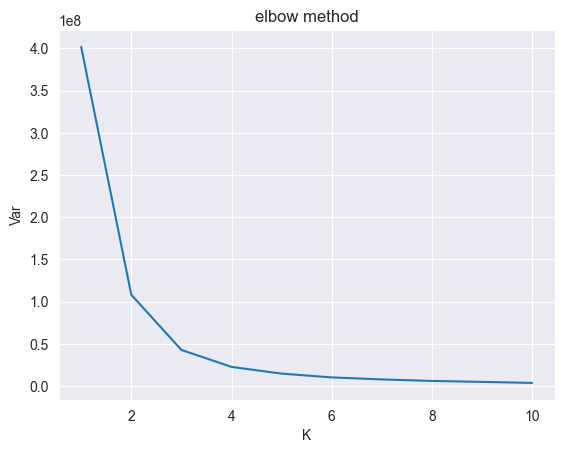

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dataset = pd.read_csv('C:/Users/Sagar K/Desktop/IPL-Batting-analysis-main/ipldata.csv', delimiter=',', nrows = nRowsRead)

dataset=dataset.dropna(axis=1)

X = dataset.iloc[:,[3,4]].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('K')
plt.ylabel('Var')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

print(y_pred[2])

24.694558386025356
